# Image Normalization Options

Let's start by running cellpose on an image and looking at the results.

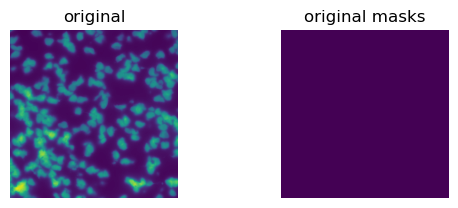

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from cellpose import io, models


img = io.imread('../../resources/raw_3.tif')
model = models.CellposeModel(gpu=True, model_type='cyto2')
masks = model.eval(img, diameter=10, channels=[0,0], normalize=False)[0]

plt.subplot(2,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('original')

plt.subplot(2,2,2)
plt.imshow(masks)
plt.axis('off')
plt.title('original masks')

plt.show()

In this example, cellpose didn't find any masks. We can look at the histogram of pixel values to see that the image is very dark and the pixel values are not well distributed over the range of possible values.

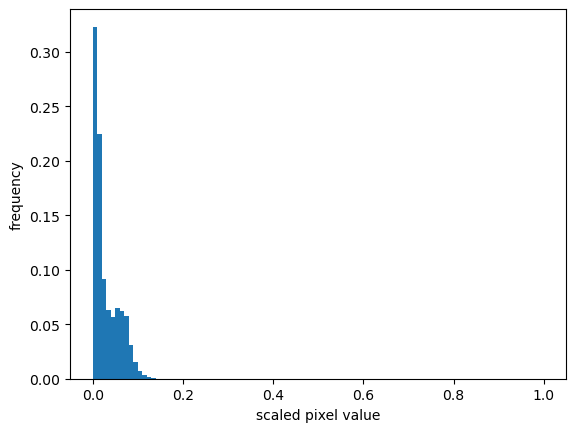

In [3]:
scaled_img = img / np.iinfo(img.dtype).max
plt.hist(scaled_img.ravel(), 
         bins=100, 
         range=(0, 1),
         weights=np.zeros_like(scaled_img.ravel()) + 1. / scaled_img.size) # convert to frequency distribution
plt.xlabel("scaled pixel value")
plt.ylabel("frequency")
plt.show()

Because the input image's data is concentrated in the lower part of the bit range, the scaled data is processed with incorrectly small values. We can normalize the image to improve the results. There are several options for normalization. The first is to normalize the image to the range [0,1]. This is done by dividing the image by the maximum pixel value. This is the default normalization option.

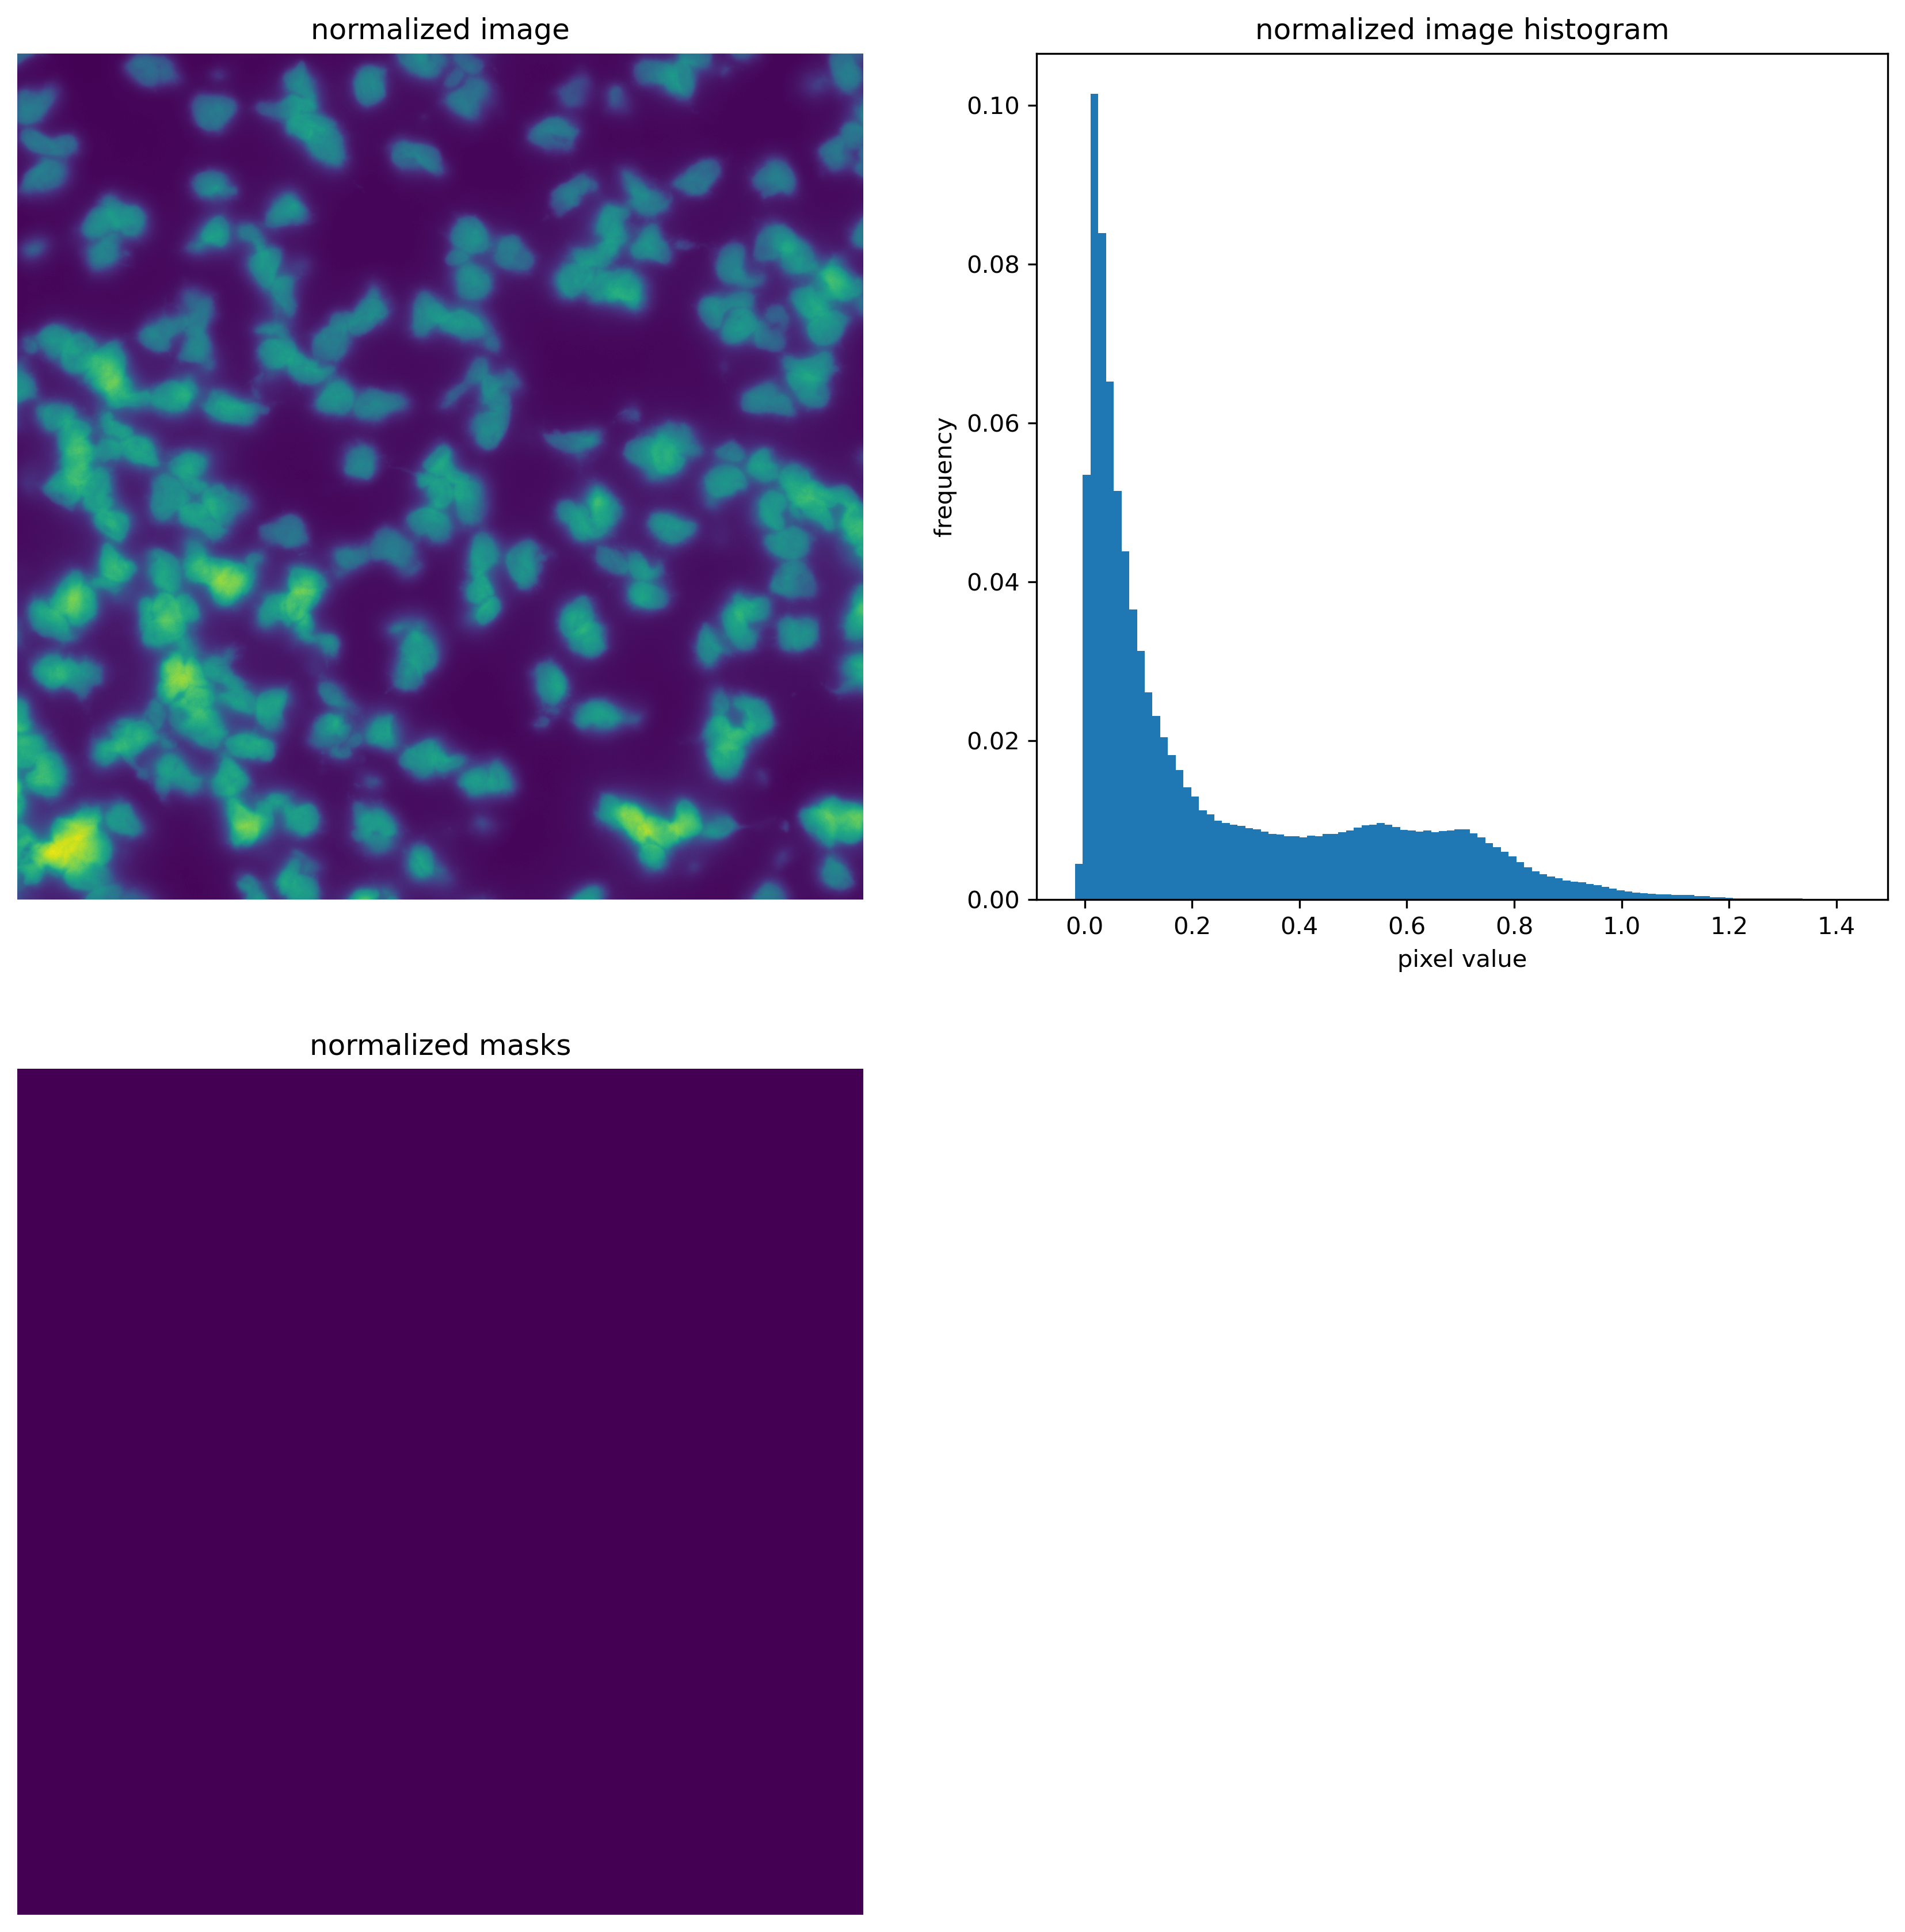

In [7]:
from cellpose import transforms


img_norm = transforms.normalize99(scaled_img)   # normalize to [0,1]
masks_norm = model.eval(img, diameter=10, channels=[0,0], normalize=False)[0]

plt.figure(figsize=(5,5), dpi=300)
plt.subplot(2, 2, 1)
plt.imshow(img_norm)
plt.axis('off')
plt.title("normalized image")

plt.subplot(2, 2, 2)
plt.hist(img_norm.ravel(),
         bins=100, 
         weights=np.zeros_like(img_norm.ravel()) + 1. / img_norm.size) # convert to frequency distribution
plt.xlabel("pixel value")
plt.ylabel("frequency")
plt.title("normalized image histogram")

plt.subplot(2, 2, 3)
plt.imshow(masks_norm)
plt.axis('off')
plt.title("normalized masks")

plt.show()

In [9]:
np.unique(masks_norm)

array([0], dtype=uint16)

In [6]:
from cellpose import transforms, utils

img_slice = transforms.normalize_img(img)   #[0,25].transpose(1,2,0).copy())
# img_slice_norm = transforms.normalize99_tile(img_slice, blocksize=100)

model = models.CellposeModel(gpu=True, model_type='TN1')
masks = model.eval(img_slice, diameter=10, channels=[2,1], normalize=False)[0]
# masks2 = model.eval(img_slice_norm, diameter=10, channels=[2,1], normalize=False)[0]



# for k, (img, mask) in enumerate(zip([img_slice, img_slice_norm], [masks, masks2])):
#     img_rgb = np.concatenate((img, np.zeros_like(img)[:,:,:1]), axis=-1)
#     img_rgb = np.clip(img_rgb, 0, 1)
#     plt.subplot(2,2,1+(k%2))
#     plt.imshow(img_rgb)
#     plt.axis('off')
#     plt.title(['original', 'tile normalization'][k])

#     plt.subplot(2,2,3+(k%2))
#     plt.imshow(img_rgb)
#     outlines = utils.outlines_list(mask)
#     for o in outlines:
#         plt.plot(o[:,0], o[:,1], color='w', lw=0.5)
#     plt.axis('off')
#     plt.title(f'{mask.max()} cells found')

# plt.tight_layout()
# plt.show()

Image needs to have at least 3 dimensions


ValueError: Image needs to have at least 3 dimensions

In [11]:
from cellpose import transforms

#img = transforms.smooth_img(img, sigma=6)
img_sharpen = transforms.smooth_sharpen_img(img, sharpen_radius=40, smooth_radius=8)
# img_sharpen = transforms.normalize99(img_sharpen)
print(img_sharpen.min(), img_sharpen.max())
model = models.CellposeModel(gpu=True, model_type='cyto')
masks = model.eval(img_sharpen, diameter=60, flow_threshold=0.4, cellprob_threshold=0)[0]

plt.figure(figsize=(6.5,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_sharpen, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6.5,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
outlines = utils.outlines_list(masks)
plt.imshow(img_sharpen, cmap='gray')
for o in outlines:
    plt.plot(o[:,0], o[:,1], 'r')
plt.axis('off')

TypeError: expected np.ndarray (got numpy.float32)